## **ENVIRONMENT SETUP**

In [ ]:
! pip install -q emoji

     |████████████████████████████████| 216 kB 5.3 MB/s 


In [ ]:
! pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=62a787bc9e4020b8aa8ee705ee59e91fd025d1772f4ec98a4c69304b9b758580
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ee214ef0a29fd67c51ee66fa35381d2f2c6aec0eb7264db1d386c28c940ce6d3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
! rm -rf data/

In [ ]:
! wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
! wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
! wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2022-10-05 05:53:43--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  54.1MB/s    in 0.3s    

2022-10-05 05:53:43 (54.1 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2022-10-05 05:53:44--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiti

## **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import re
import emoji
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## **LOAD DATASET**

In [ ]:
# Load seperate files

df1 = pd.read_csv("./data/full_dataset/goemotions_1.csv")
df2 = pd.read_csv("./data/full_dataset/goemotions_2.csv")
df3 = pd.read_csv("./data/full_dataset/goemotions_3.csv")

In [ ]:
# Concat all 

df = pd.concat([df1, df2, df3])
df

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
71221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
71222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
71223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop columns

df = df.drop(
    ['id', 'author', 'subreddit', 'link_id', 
     'parent_id', 'created_utc', 'rater_id'], 
    axis=1)

In [ ]:
# Drop unclear examples

df = df.drop(df[df['example_very_unclear'] == True].index, axis=0)
df = df.drop(['example_very_unclear'], axis=1)
df

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71219,"Well, I'm glad you're out of all that now. How...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71220,Everyone likes [NAME].,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
71221,Well when you’ve imported about a gazillion of...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71222,That looks amazing,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **VISUALIZATION**

In [ ]:
text=df['text']
len(text)

201202

### Character level exploration

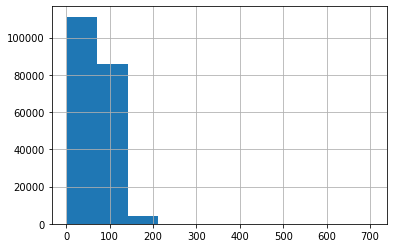

In [ ]:
#Character exploration

#number of characters present in each sentence
df['text'].str.len().hist()

#The histogram shows that the comments range from 1 to 700 characters 
#and generally, it is between 1 to 210 characters.



### Word level exploration

In [ ]:
#average word length
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

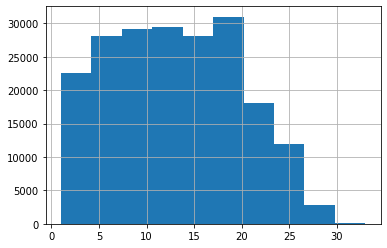

In [ ]:
plot_word_number_histogram(df['text'])

#the average word length ranges from 1 to 34 and 
#most common word length are between 1 to 20.

# We can infer that there are people who use short words as well as long words.
# There is a possibility that most of these short words could be stopwords. 

### Top 10 stopwords used

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

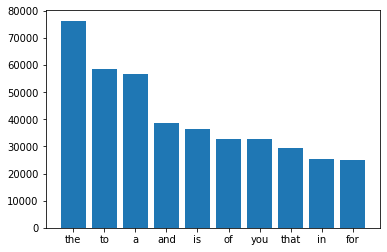

In [ ]:
plot_top_stopwords_barchart(df['text'])

#we can see that stopwords like 'the', 'to', 'a', etc are used so many times in a comment.


### Common words other than stopwords

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new_ = text.str.lower()
    new = new_.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y=[], []
    for word,count in most[:60]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

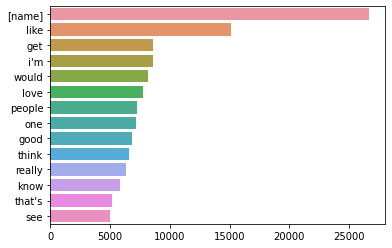

In [ ]:
plot_top_non_stopwords_barchart(df['text'])

# the [name] refers to a person with a name
# It can be noticed that in reddit comments, people mostly refer the comment to a particular person in mind or related to the post.

### N-gram exploration

In [ ]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new_ = text.str.lower()
    new= new_.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

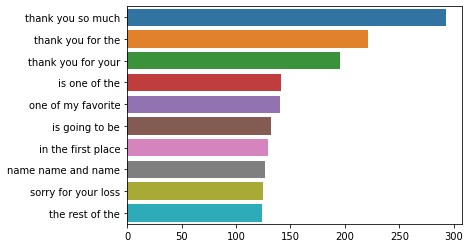

In [ ]:
plot_top_ngrams_barchart(df['text'],4)

# We can see that the top-3 4-gram words used are for thanking someone. 
# There are also mostly positive set of words in the commets like talking about favourites, consolidating others, etc

### Topic Modeling

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
#import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df['text'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.show_topics()

[(0,
  '0.077*"NAME" + 0.014*"n\'t" + 0.010*"What" + 0.008*"..." + 0.008*"That" + 0.007*"game" + 0.007*"The" + 0.007*"year" + 0.007*"one" + 0.006*"like"'),
 (1,
  '0.013*"get" + 0.012*"good" + 0.010*"You" + 0.010*"time" + 0.009*"like" + 0.009*"one" + 0.008*"Thanks" + 0.008*"day" + 0.008*"..." + 0.007*"Thank"'),
 (2,
  '0.021*"n\'t" + 0.010*"people" + 0.010*"You" + 0.010*"actually" + 0.009*"like" + 0.008*"The" + 0.008*"would" + 0.006*"know" + 0.006*"\'re" + 0.006*"shit"'),
 (3,
  '0.017*"n\'t" + 0.016*"like" + 0.015*"NAME" + 0.011*"people" + 0.010*"would" + 0.008*"someone" + 0.008*"think" + 0.008*"make" + 0.007*"love" + 0.006*"mean"')]

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.123985  0.181009       1        1  27.310778
0      0.117419 -0.081843       2        1  26.743106
3      0.005910 -0.147528       3        1  25.219680
2     -0.247315  0.048362       4        1  20.726436, topic_info=         Term          Freq         Total Category  logprob  loglift
13       NAME  34448.000000  34448.000000  Default  30.0000  30.0000
123      What   3799.000000   3799.000000  Default  29.0000  29.0000
81       good   5847.000000   5847.000000  Default  28.0000  28.0000
577  actually   2824.000000   2824.000000  Default  27.0000  27.0000
268    Thanks   3232.000000   3232.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
341      look   1025.462364   4329.830349   Topic4  -5.6561   0.1334
115      This   1070.005573   6906.424169   Topic4  -5.6135  -0.2910
0        That   1086.518160   8339.013432   Topic4  -5.5982  -0.4642
36      still    952.442329   3923.512764   Topic4  -5.7299   0.1580
89        get    946.523685   8987.175882   Topic4  -5.7362  -0.6770

[291 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
77        1  0.997952   'll
77        3  0.001544   'll
416       1  0.413766   're
416       2  0.139674   're
416       3  0.141538   're
...     ...       ...   ...
1447      3  0.998932   wow
51        1  0.277215  year
51        2  0.581315  year
51        4  0.141472  year
246       2  0.999341   yes

[408 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

### Word clouds

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


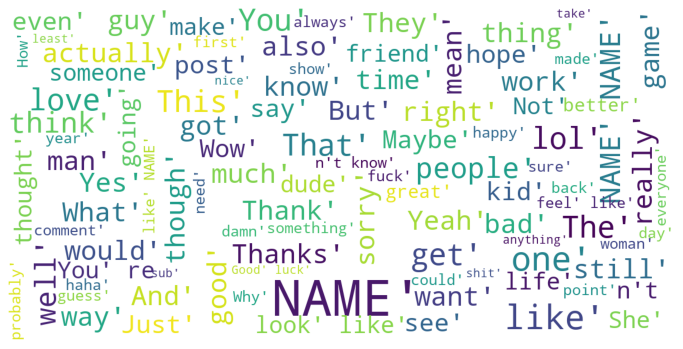

In [ ]:
plot_wordcloud(df['text'])

In [ ]:
admiration = df['admiration'].sum()
amusement = df['amusement'].sum()
anger = df['anger'].sum()
approval = df['approval'].sum()
caring = df['caring'].sum()
confusion = df['confusion'].sum()
curiosity = df['curiosity'].sum()
desire = df['desire'].sum()
disappointment = df['disappointment'].sum()
disapproval = df['disapproval'].sum()
disgust = df['disgust'].sum()
embarrassment = df['embarrassment'].sum()
excitement = df['excitement'].sum()
fear = df['fear'].sum()
gratitude = df['gratitude'].sum()
grief = df['grief'].sum()
joy = df['joy'].sum()
love = df['love'].sum()
nervousness = df['nervousness'].sum()
optimism = df['optimism'].sum()
pride = df['pride'].sum()
realization = df['realization'].sum()
relief = df['relief'].sum()
remorse = df['remorse'].sum()
sadness = df['sadness'].sum()
surprise = df['surprise'].sum()
neutral = df['neutral'].sum()

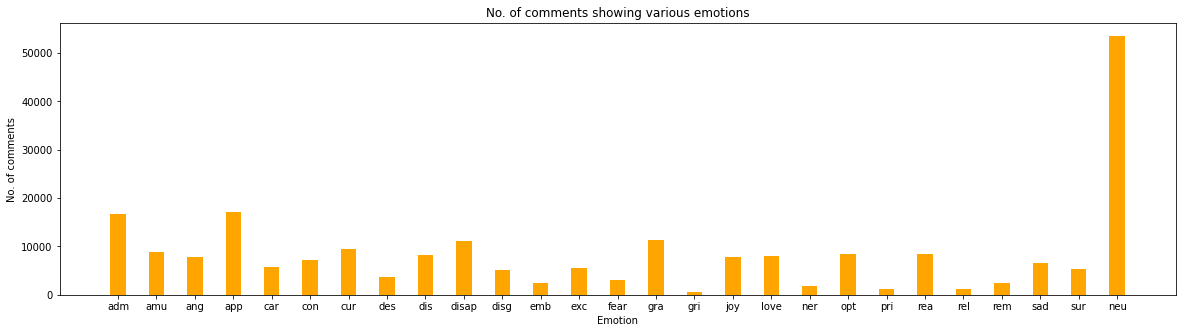

In [ ]:
#data = {'admiration':admiration, 'amusement':amusement, 'anger':anger, 'approval':approval, 'caring':caring, 'confusion':confusion, 'curiosity':curiosity, 'desire':desire, 'disappointment':disappointment, 'disapproval':disapproval, 'disgust':disgust, 'embarrassment':embarrassment, 'excitement':excitement, 'fear':fear, 'gratitude':gratitude, 'grief':grief, 'joy':joy, 'love':love, 'nervousness':nervousness, 'optimism':optimism, 'pride':pride, 'realization':realization, 'relief':relief, 'remorse':remorse, 'sadness':sadness, 'surprise':surprise, 'neutral':neutral}
data = {'adm':admiration, 'amu':amusement, 'ang':anger, 'app':approval, 'car':caring, 'con':confusion, 'cur':curiosity, 'des':desire, 'dis':disappointment, 'disap':disapproval, 'disg':disgust, 'emb':embarrassment, 'exc':excitement, 'fear':fear, 'gra':gratitude, 'gri':grief, 'joy':joy, 'love':love, 'ner':nervousness, 'opt':optimism, 'pri':pride, 'rea':realization, 'rel':relief, 'rem':remorse, 'sad':sadness, 'sur':surprise, 'neu':neutral}

emotion_key = list(data.keys())
emotion_value = list(data.values())

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(emotion_key, emotion_value, color ='orange',
        width = 0.4)
 
plt.xlabel("Emotion")
plt.ylabel("No. of comments")
plt.title("No. of comments showing various emotions")
plt.show()

#Highest - neutral
#lowest grief
#next highest - admiration and approval

In [ ]:
emotion_list = list(data.keys())
emotion_value1 = list(data.values())
emotion_value1 = np.array(emotion_value1)

In [ ]:
emotion_value1

array([16609,  8943,  7828, 17053,  5795,  7126,  9375,  3700,  8209,
       11062,  5144,  2401,  5457,  3087, 11237,   656,  7726,  7920,
        1753,  8446,  1263,  8490,  1259,  2450,  6574,  5343, 53528])

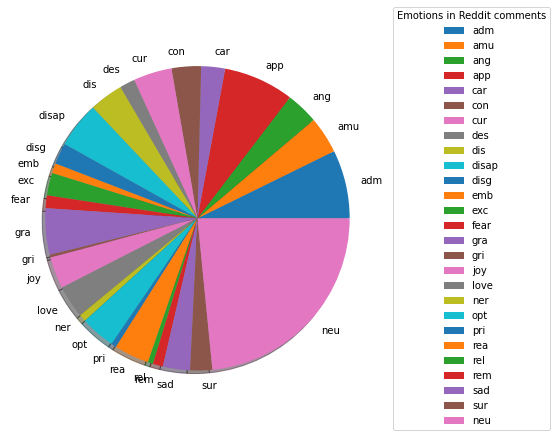

In [ ]:
emotion_list = list(data.keys())
emotion_value = list(data.values())
emotion_value = np.array(emotion_value)
y = emotion_value
mylabels = emotion_list
fig, ax = plt.subplots(figsize =(20, 7))
plt.pie(y, labels = mylabels, shadow = True,)
plt.legend(title = "Emotions in Reddit comments", loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show() 

In [ ]:
text = df['text'].to_numpy()
labels = df.drop(['text'], axis=1).to_numpy()

In [ ]:
print(f"Size of dataset = {text.shape[0]}")
print(f"Number of classes = {labels.shape[1]}")

Size of dataset = 201202
Number of classes = 28


## **DATA PRE-PROCESSING**

In [ ]:
def clean_text(text):
    text = re.sub(r'(?:^| )(/?r/[a-z]+)', ' ', text) # Remove mention of subreddit
    text = emoji.replace_emoji(text, replace='') # Remove emojis
    text = text.replace('[NAME]', '') # Remove [NAME]
    text = re.sub(r'[^\w]', ' ', text) # Remove symbols
    text = re.sub(r'[ ]{2,}', ' ', text) # Remove extra spaces
    text = re.sub(r'[ \t]+$', '', text) # Remove trailing white spaces
    return text

In [ ]:
# Clean the text

text = list(map(clean_text, text))

In [ ]:
# Vectorize the text data

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)

In [ ]:
vectors

<201202x30586 sparse matrix of type '<class 'numpy.float64'>'
	with 2301725 stored elements in Compressed Sparse Row format>

In [ ]:
print(f'Length of vector = {vectors.shape[1]}') # This is too long

Length of vector = 30586


## **DIMENSIONALITY REDUCTION**

In [ ]:
# Using TruncatedSVD to reduce the dimensions as PCA does not work on sparse matrix
dim_reducer = TruncatedSVD(n_components=100)

In [ ]:
reduced_vectors = dim_reducer.fit_transform(vectors)

In [ ]:
print(f'Length of reduced vector = {reduced_vectors.shape[1]}')

Length of reduced vector = 100


# SPLITTING THE DATA

In [ ]:
X = reduced_vectors
y = labels

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [ ]:
X_train

array([[ 0.23689063,  0.01096674,  0.05534394, ...,  0.02921601,
         0.01536789, -0.03493945],
       [ 0.27113271, -0.08368857, -0.06873978, ..., -0.11357608,
        -0.03075032,  0.08107195],
       [ 0.16203636, -0.06093417, -0.02284215, ...,  0.00812245,
        -0.01220549, -0.01083983],
       ...,
       [ 0.16863609, -0.08696761,  0.0786298 , ..., -0.0054036 ,
         0.02378817,  0.05567013],
       [ 0.06944947, -0.03372859,  0.00456219, ...,  0.01211751,
         0.00773234, -0.01419743],
       [ 0.16030665,  0.12156705, -0.05382182, ...,  0.00228746,
         0.04773625,  0.03961397]])

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train.shape

(150901, 100)

In [ ]:
y_train.shape

(150901, 28)

# KNN ALGORITHM

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1561797976183376


*KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.*

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.09596230691238743


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20029422874296735


# DECISION TREES

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

predicted_value = model.predict(X_test)
print(predicted_value)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20029422874296735


In [ ]:
zeroes = 0
ones = 0
for i in range(0,len(y_train)):
    if (y_train[i] == 0).any:
        zeroes +=1
    else:
        ones +=1
#%%       
print(zeroes)
print(ones)
#%%
val = 1 - ((zeroes/75)*2 + (ones/75)*2)
print("Gini :",val)

150901
0
Gini : -4023.0266666666666


# K MEANS ALGORITHM

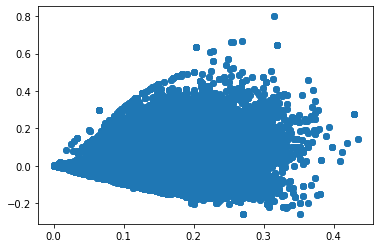

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans = KMeans(init="random",n_clusters=3, n_init=10,max_iter=300,random_state=42)

In [ ]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
kmeans.cluster_centers_.shape

(3, 100)

In [ ]:
kmeans.n_iter_

12